In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv("heart.csv")
df.head()


,General_Health,Exercise,Depression,Diabetes,Sex,Age_Category,Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Heart_Disease
0,Poor,No,No,No,Female,70-74,32.66,14.54,Yes,No,No
1,Very Good,No,No,Yes,Female,70-74,77.11,28.29,No,No,Yes
2,Very Good,Yes,No,Yes,Female,60-64,88.45,33.47,No,No,No
3,Poor,Yes,No,Yes,Male,75-79,93.44,28.73,No,Yes,Yes
4,Good,No,No,No,Male,80+,88.45,24.37,Yes,Yes,No


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   General_Health       999 non-null    object 
 1   Exercise             999 non-null    object 
 2   Depression           999 non-null    object 
 3   Diabetes             999 non-null    object 
 4   Sex                  999 non-null    object 
 5   Age_Category         999 non-null    object 
 6   Weight_(kg)          999 non-null    float64
 7   BMI                  999 non-null    float64
 8   Smoking_History      999 non-null    object 
 9   Alcohol_Consumption  999 non-null    object 
 10  Heart_Disease        999 non-null    object 
dtypes: float64(2), object(9)
memory usage: 86.0+ KB


,Weight_(kg),BMI
count,999.000000,999.00000
mean,80.999409,28.56035
std,19.803497,6.22184
min,32.660000,14.06000
25%,67.590000,24.21000
50%,79.380000,27.78000
75%,91.170000,31.89000
max,167.830000,51.81000


In [4]:
df.isnull().sum()


,0
General_Health,0
Exercise,0
Depression,0
Diabetes,0
Sex,0
Age_Category,0
Weight_(kg),0
BMI,0
Smoking_History,0
Alcohol_Consumption,0


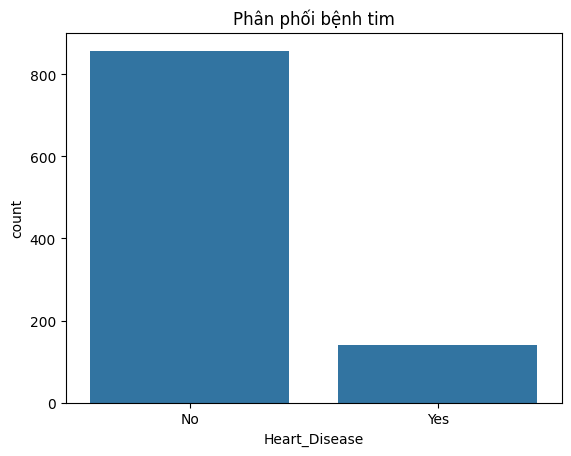

In [6]:
sns.countplot(x='Heart_Disease', data=df)
plt.title("Phân phối bệnh tim")
plt.show()


In [7]:
X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']


In [8]:
X = pd.get_dummies(X, drop_first=True)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.845


In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.845


In [13]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

          No       0.86      0.98      0.92       172
         Yes       0.00      0.00      0.00        28

    accuracy                           0.84       200
   macro avg       0.43      0.49      0.46       200
weighted avg       0.74      0.84      0.79       200



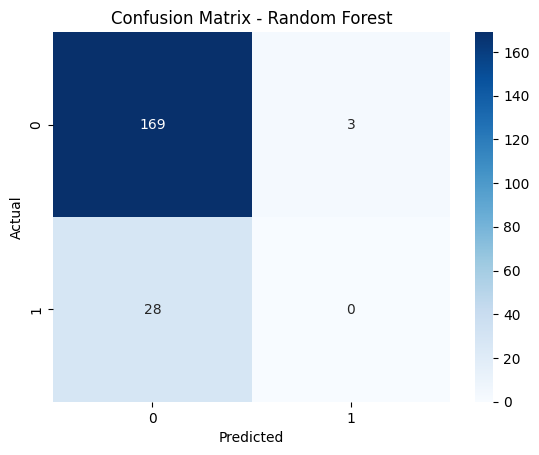

In [14]:
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:
import numpy as np

feature_names = X.columns
importances = rf.feature_importances_

fi = pd.Series(importances, index=feature_names)\
        .sort_values(ascending=False)

fi.head(15)


,0
BMI,0.233977
Weight_(kg),0.225516
General_Health_Poor,0.060814
Sex_Male,0.049985
Smoking_History_Yes,0.046922
Alcohol_Consumption_Yes,0.046258
Exercise_Yes,0.042761
Diabetes_Yes,0.041122
General_Health_Fair,0.035200
Age_Category_80+,0.030004


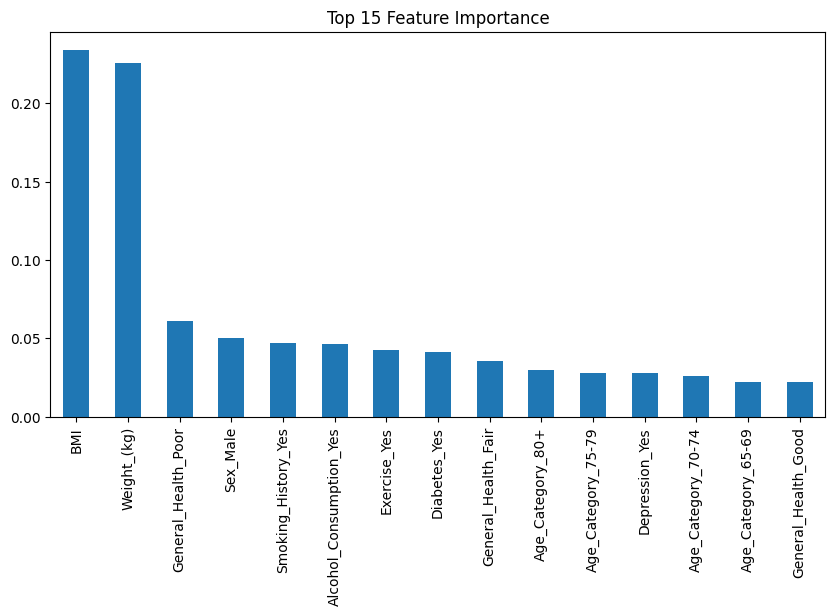

In [16]:
fi.head(15).plot(kind='bar', figsize=(10,5))
plt.title("Top 15 Feature Importance")
plt.show()
